In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                                                      
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [115]:
df_matches=pd.read_csv(r"Documents\matches.csv")
df_delivery=pd.read_csv(r"Documents\deliveries.csv")

In [116]:
df_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [117]:
df_matches[pd.isnull(df_matches['winner'])]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [118]:
# draw the matches where winner is null
df_matches['winner'].fillna('Draw', inplace=True)

In [120]:
df_matches['winner'] = df_matches['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
df_matches['team1'] = df_matches['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
df_matches['team2'] = df_matches['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
df_matches['toss_winner'] = df_matches['toss_winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

df_matches['winner'] = df_matches['winner'].replace('Delhi Capitals','Delhi Daredevils')
df_matches['team1'] = df_matches['team1'].replace('Delhi Capitals','Delhi Daredevils')
df_matches['team2'] = df_matches['team2'].replace('Delhi Capitals','Delhi Daredevils')
df_matches['toss_winner'] = df_matches['toss_winner'].replace('Delhi Capitals','Delhi Daredevils')

In [121]:
df_matches.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Delhi Daredevils                86
Rajasthan Royals                81
Sunrisers Hyderabad             66
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Draw                             4
Name: winner, dtype: int64

In [122]:
df_matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
df_matches.replace(encode, inplace=True)
df_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,3,2,3,field,2,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,9,5,5,bat,5,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,7,6,6,bat,7,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,1,3,1,bat,3,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,2,4,4,bat,2,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [123]:
#we maintain a dictionary for future reference mapping teams
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
MI


In [124]:
#Find cities which are null
df_matches[pd.isnull(df_matches['city'])]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,7,3,3,field,3,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,3,1,3,field,3,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,2,7,2,bat,7,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,6,9,9,field,9,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,9,10,10,field,9,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,6,5,6,field,5,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,3,2,3,field,2,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,10,7,10,bat,10,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,5,1,1,bat,5,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,7,1,1,bat,7,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


In [125]:
#City is also null, this is mainly for Dubai stadium. Hence update the City as Dubai
#and null for sharjah stadium which is also in dubai
df_matches['city'].fillna('Dubai',inplace=True)
df_matches.describe()

,id,neutral_venue,team1,team2,toss_winner,winner,result_margin
count,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,799.000000
mean,7.563496e+05,0.094363,5.458333,5.536765,5.387255,5.306373,17.321652
std,3.058943e+05,0.292512,3.247384,3.302146,3.209195,3.258478,22.068427
min,3.359820e+05,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.012278e+05,0.000000,3.000000,3.000000,2.750000,2.000000,6.000000
50%,7.292980e+05,0.000000,5.000000,5.000000,5.000000,5.000000,8.000000
75%,1.082626e+06,0.000000,8.000000,9.000000,7.000000,7.250000,19.500000
max,1.237181e+06,1.000000,13.000000,13.000000,13.000000,14.000000,146.000000


In [126]:
df_matches = df_matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
df_matches.tail()

,team1,team2,city,toss_decision,toss_winner,venue,winner
811,3,1,Dubai,field,1,Dubai International Cricket Stadium,3
812,1,7,Dubai,field,7,Dubai International Cricket Stadium,1
813,3,10,Abu Dhabi,field,10,Sheikh Zayed Stadium,10
814,7,10,Abu Dhabi,bat,7,Sheikh Zayed Stadium,7
815,7,1,Dubai,bat,7,Dubai International Cricket Stadium,1


In [127]:
df = pd.DataFrame(df_matches)
df.describe()

,team1,team2,toss_winner,winner
count,816.000000,816.000000,816.000000,816.000000
mean,5.458333,5.536765,5.387255,5.306373
std,3.247384,3.302146,3.209195,3.258478
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.750000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,8.000000,9.000000,7.000000,7.250000
max,13.000000,13.000000,13.000000,14.000000


In [129]:
#Find some stats on the match winners and toss winners
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
    print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
    print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))


No of toss winners by each team
MI -> 106
DD -> 100
KKR -> 98
CSK -> 97
RR -> 87
RCB -> 87
KXIP -> 85
SRH -> 57
DC -> 43
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 120
CSK -> 106
KKR -> 99
RCB -> 91
KXIP -> 88
DD -> 86
RR -> 81
SRH -> 66
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 4


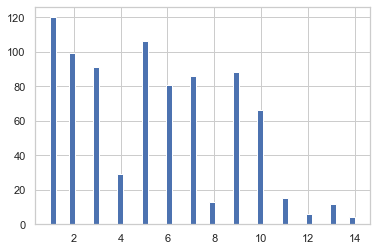

In [130]:
#shows that Mumbai won most matches followed by Chennai
df['winner'].hist(bins=50)

Text(0.5, 1.0, 'Probability of match winning by winning toss')

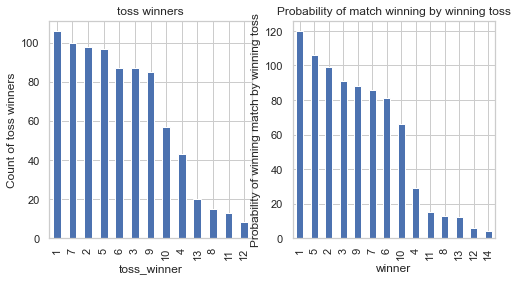

In [131]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Probability of winning match by winning toss')
ax2.set_title("Probability of match winning by winning toss")

In [132]:
#find the null values in every column
df.apply(lambda x: sum(x.isnull()),axis=0) 
    

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [133]:
#building predictive model
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

team1            int64
team2            int64
city             int32
toss_decision    int32
toss_winner      int64
venue            int32
winner           int64
dtype: object

In [145]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  
  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  kf = KFold(data.shape[0], n_splits=5)
  error = []
  for train, test in kf.split(data[predictors]):
    train_predictors = (data[predictors].iloc[train,:])
    
    train_target = data[outcome].iloc[train]
    
    model.fit(train_predictors, train_target)
    
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome])

In [146]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner']
model = LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 24.020%
Cross-Validation Score : 22.672%


In [147]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 87.868%
Cross-Validation Score : 48.284%


In [148]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='RCB'
team2='KKR'
toss_winner='RCB'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

RCB


In [149]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='DC'
team2='DD'
toss_winner='DC'
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner],'14','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

DD


In [150]:
#feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners 
#followed by toss winning, city
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(imp_input)

team2            0.261295
team1            0.196948
toss_winner      0.191249
venue            0.145619
city             0.133680
toss_decision    0.071210
dtype: float64


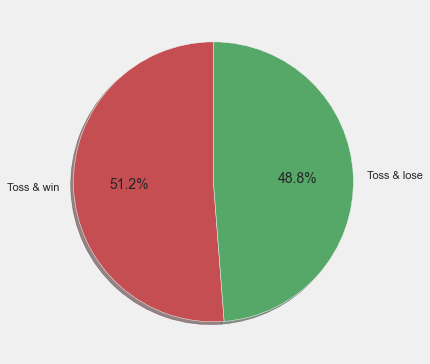

In [152]:
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 816 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]
slices=[len(df_fil),(816-len(df_fil))]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 

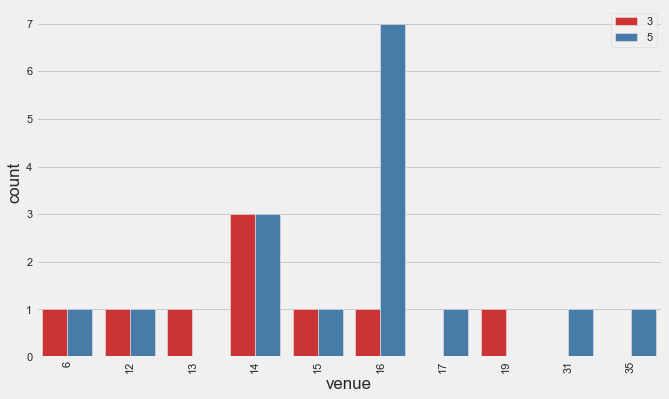

In [158]:
#top 2 team analysis based on number of matches won against each other and how venue affects them?
#Previously we noticed that CSK won 79, RCB won 70 matches
#now let us compare venue against a match between CSK and RCB
#we find that CSK has won most matches against RCB in MA Chidambaram Stadium, Chepauk, Chennai
#RCB has not won any match with CSK in stadiums St George's Park and Wankhede Stadium, but won matches
#with CSK in Kingsmead, New Wanderers Stadium.
#It does prove that chances of CSK winning is more in Chepauk stadium when played against RCB.
# Proves venue is important feature in predictability
import seaborn as sns
team1=dicVal['CSK']
team2=dicVal['RCB']
mtemp=df_matches[((df_matches['team1']==team1)|(df_matches['team2']==team1))&((df_matches['team1']==team2)|(df_matches['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set1')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

In [164]:
df_delivery.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
